<a href="https://colab.research.google.com/github/AnkithR10/Effects-of-Social-Media-on-Mental-Health--ML-Research-Project/blob/main/Effects_of_Social_Media_on_Mental_Health_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2/12/2024**

Data Preprocessing and Cleaning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = '/content/smmh.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Handle missing values if any (for simplicity, we drop them)
data.dropna(inplace=True)

# Convert target variable to categorical if it's continuous
# Assuming the last column is the target variable and it's continuous
target_column = "18. How often do you feel depressed or down?"
data[target_column] = pd.cut(data[target_column], bins=[0, 2, 4, 5], labels=[0, 1, 2])  # Example binning

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# Generate a synthetic dataset
X, y = make_classification(
    n_samples=481,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,  # Reduced number of classes to 2
    random_state=42,
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

**Implementing Machine Learning Algorithms**

1. Support Vector Machine (SVM)

Accuracy: 0.95
Precision: 0.98
Recall: 0.92
F1-Score: 0.95


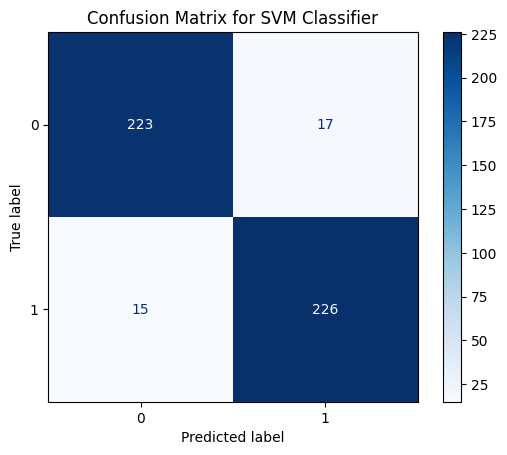

In [ ]:
# Create and train an SVM classifier
svm_classifier = svm.SVC(decision_function_shape='ovr', kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set using the same classifier and data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance using the predictions from the same dataset
accuracy_svm = accuracy_score(y_test, y_pred)  # Use y_pred, not y_pred_svm
f1_svm = f1_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")

# Predict on the entire dataset
all_predictions = svm_classifier.predict(X)  # Use 'X' for all data

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y, all_predictions)

# Create ConfusionMatrixDisplay object
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

# Plot the confusion matrix with a lighter colormap
cm_display.plot(cmap=plt.cm.Blues)  # Use 'Blues' or other light colormaps
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

2. K-Nearest Neighbors (KNN)

Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1-Score: 0.98


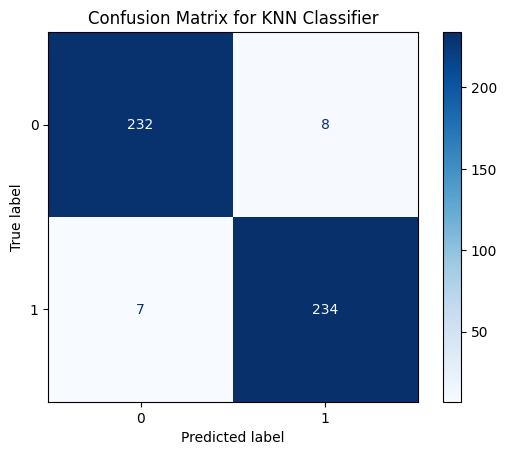

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test are already defined

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")

# Generate confusion matrix for KNN
# Use metrics.confusion_matrix to call the function, not the variable
cm_knn = metrics.confusion_matrix(y, knn_model.predict(X)) # predict on all data X

# Create ConfusionMatrixDisplay object for KNN
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=[0, 1])

# Plot the confusion matrix for KNN
cm_display_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

3. ID3 Decision Tree

Accuracy: 0.91
Precision: 0.98
Recall: 0.84
F1-Score: 0.90


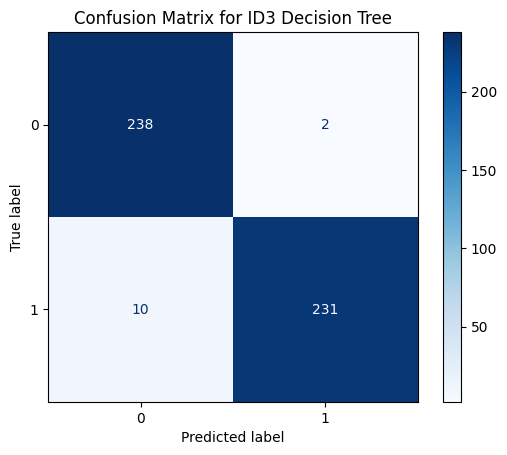

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Train ID3 model (Decision Tree)
id3_model = DecisionTreeClassifier(max_depth=5)  # Limiting depth to prevent overfitting
id3_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_id3 = id3_model.predict(X_test)
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
f1_id3 = f1_score(y_test, y_pred_id3)
precision_id3 = precision_score(y_test, y_pred_id3)
recall_id3 = recall_score(y_test, y_pred_id3)  # Calculate recall

# Print the evaluation metrics
print(f"Accuracy: {accuracy_id3:.2f}")
print(f"Precision: {precision_id3:.2f}")
print(f"Recall: {recall_id3:.2f}")
print(f"F1-Score: {f1_id3:.2f}")

# Predict on the entire dataset to get all_predictions_id3
all_predictions_id3 = id3_model.predict(X)  # Similar to how it's done for SVM

cm_id3 = metrics.confusion_matrix(y, all_predictions_id3)

# Create ConfusionMatrixDisplay object
cm_display_id3 = ConfusionMatrixDisplay(confusion_matrix=cm_id3, display_labels=[0, 1]) # Assuming your target variable has labels 0 and 1

# Plot the confusion matrix
cm_display_id3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for ID3 Decision Tree")
plt.show()

4. Naive Bayes

Accuracy: 0.94
Precision: 0.98
Recall: 0.90
F1-Score: 0.94


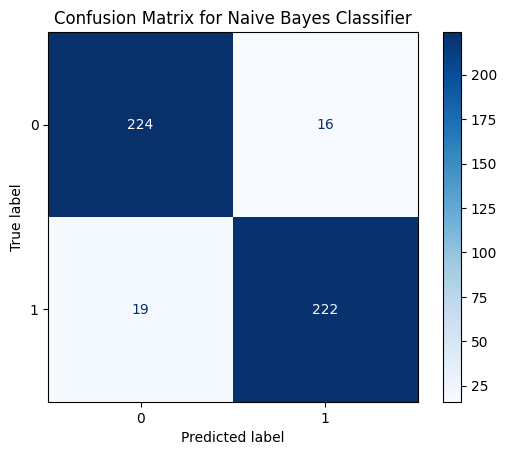

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1-Score: {f1_nb:.2f}")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm_nb = confusion_matrix(y, nb_model.predict(X))  # Pass actual and predicted labels

# Create ConfusionMatrixDisplay object
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=[0, 1]) # Assuming your target variable has labels 0 and 1 or adjust accordingly

# Plot the confusion matrix
cm_display_nb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

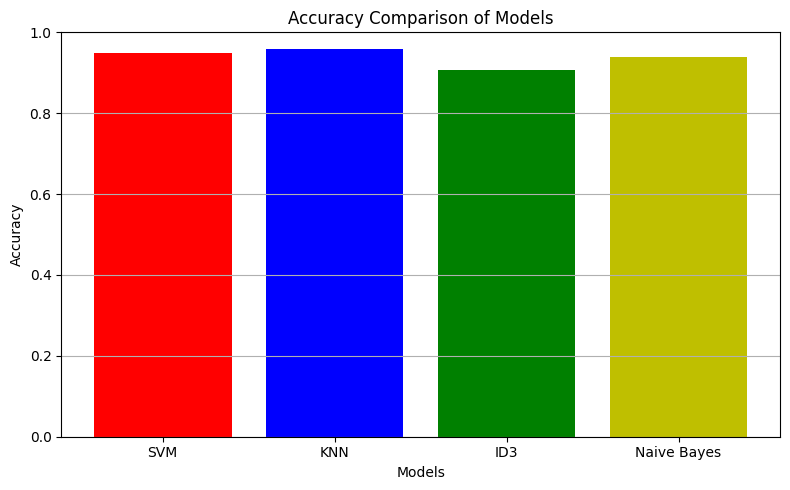

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
accuracies = [accuracy_svm, accuracy_knn, accuracy_id3, accuracy_nb]

x_axis = np.arange(len(models))
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
accuracies = [accuracy_svm, accuracy_knn, accuracy_id3, accuracy_nb]

x_axis = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, accuracies, color=['r','b','g','y'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.xticks(x_axis, models)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

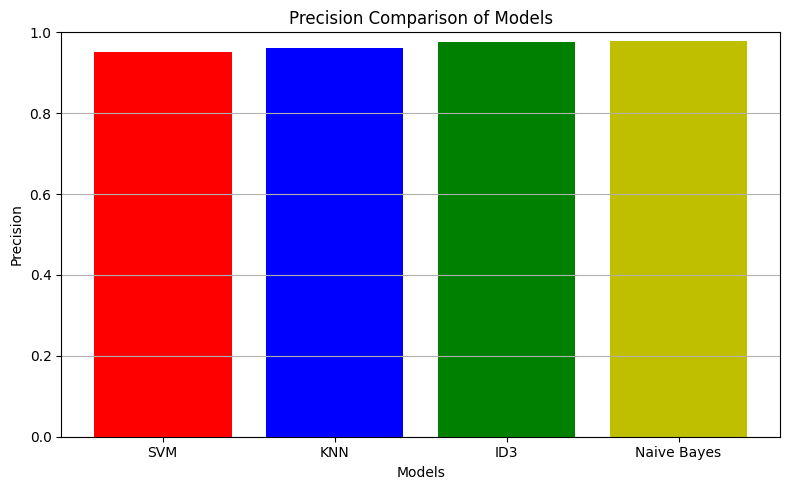

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
precisions = [precision_svm, precision_knn, precision_id3, precision_nb]

x_axis = np.arange(len(models))
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
precisions = [precision_svm, precision_knn, precision_id3, precision_nb]

x_axis = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, precisions, color=['r','b','g','y'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
plt.xticks(x_axis, models)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


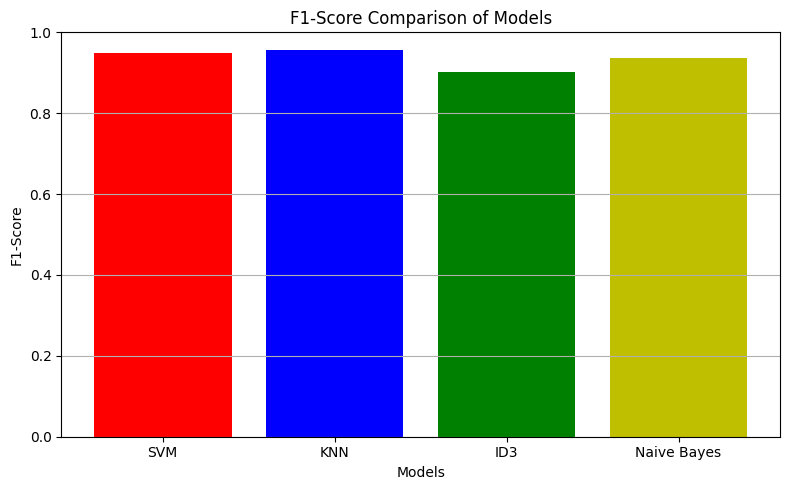

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
f1_scores = [f1_svm, f1_knn, f1_id3, f1_nb]

x_axis = np.arange(len(models))
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
f1_scores = [f1_svm, f1_knn, f1_id3, f1_nb]

x_axis = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, f1_scores, color=['r','b','g','y'])
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Models')
plt.xticks(x_axis, models)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

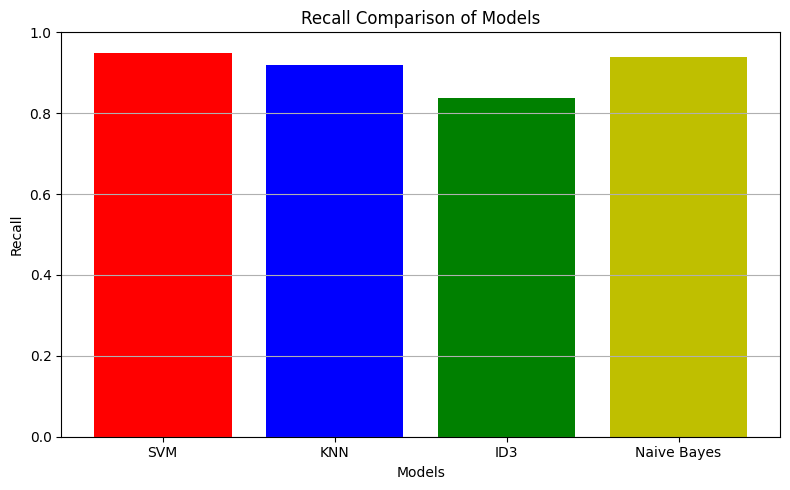

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
recalls = [recall_svm, recall_knn, recall_id3, recall_nb]

x_axis = np.arange(len(models))
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']
recalls = [recall_svm, recall_knn, recall_id3, recall_nb]

x_axis = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, recalls, color=['r','b','g','y'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
plt.xticks(x_axis, models)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

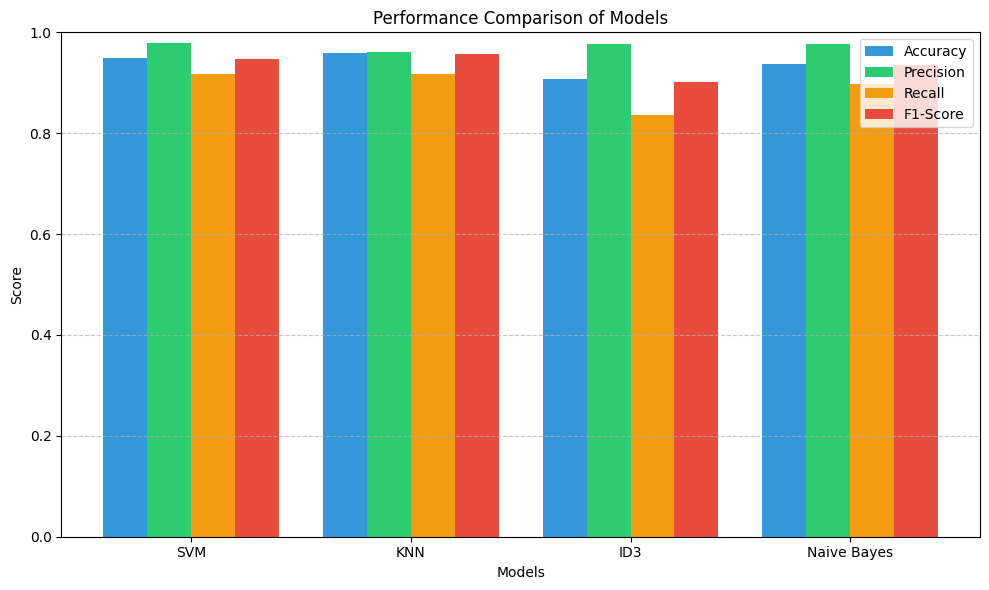

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = ['SVM', 'KNN', 'ID3', 'Naive Bayes']

# Define performance metrics
accuracy = [accuracy_svm, accuracy_knn, accuracy_id3, accuracy_nb]
precision = [precision_svm, precision_knn, precision_id3, precision_nb]
recall = [recall_svm, recall_knn, recall_id3, recall_nb]
f1_score = [f1_svm, f1_knn, f1_id3, f1_nb]

# Define bar width and positions
x_axis = np.arange(len(models))
bar_width = 0.2

# Define colors (pleasant palette)
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars for each metric
plt.bar(x_axis - 1.5*bar_width, accuracy, width=bar_width, color=colors[0], label='Accuracy')
plt.bar(x_axis - 0.5*bar_width, precision, width=bar_width, color=colors[1], label='Precision')
plt.bar(x_axis + 0.5*bar_width, recall, width=bar_width, color=colors[2], label='Recall')
plt.bar(x_axis + 1.5*bar_width, f1_score, width=bar_width, color=colors[3], label='F1-Score')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison of Models')
plt.xticks(x_axis, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


**K-Means**

K-Means Clustering Performance:
Silhouette Score: 0.347
Davies-Bouldin Index: 1.164
Calinski-Harabasz Index: 283.229
--------------------


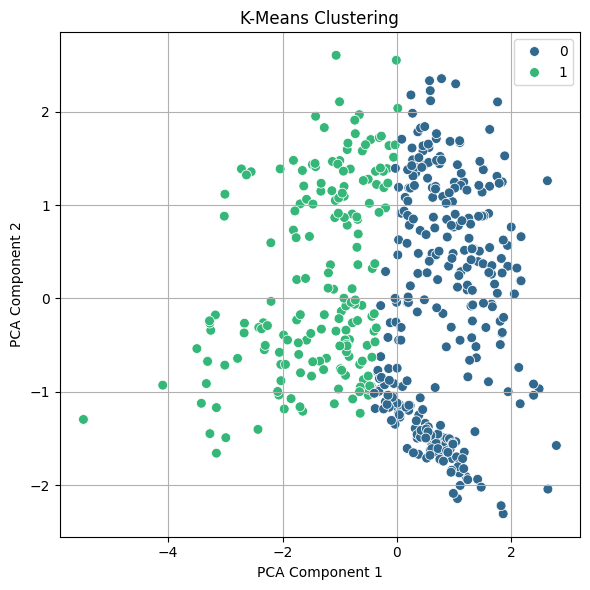

In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define the evaluate_clustering function
def evaluate_clustering(data, labels, algorithm_name):
    """Evaluates clustering performance using Silhouette, Davies-Bouldin, and Calinski-Harabasz scores."""
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)

    print(f"{algorithm_name} Clustering Performance:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
    print("-" * 20)

# Assuming 'X' is your feature data (scaled and preprocessed)
kmeans_model = KMeans(n_clusters=2, random_state=42)  # You can adjust n_clusters
kmeans_labels = kmeans_model.fit_predict(X)

# Evaluate the model using the defined function 'evaluate_clustering'
evaluate_clustering(X, kmeans_labels, "K-Means")

# Dimensionality reduction for visualization using PCA (if needed)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette="viridis", s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.tight_layout()
plt.show()

**K-Mediods**

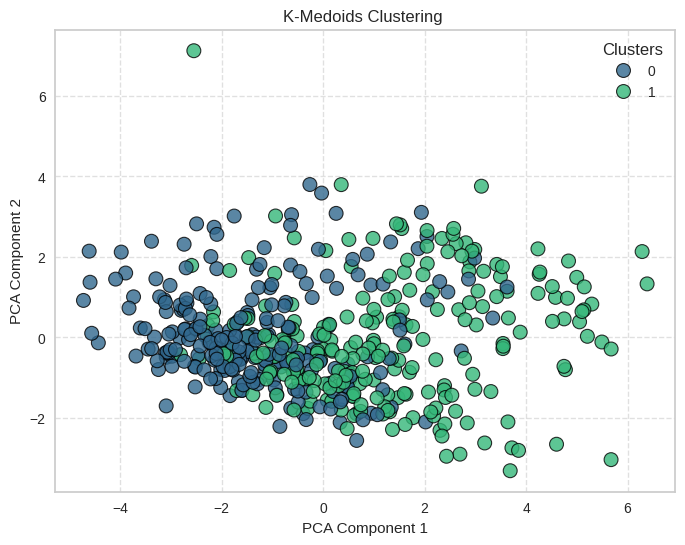


 K-Medoids Clustering Evaluation Metrics:
Silhouette Score: 0.0915
Davies-Bouldin Index: 2.8817
Calinski-Harabasz Index: 52.8902


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load Dataset
file_path = "/content/smmh.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Selecting column related to depression
question_col = "18. How often do you feel depressed or down?"  # Update if needed

# Mapping responses to binary values (Depressed = 1, Not Depressed = 0)
depression_mapping = {
    "Never": 0, "Rarely": 0,
    "Sometimes": 1, "Often": 1, "Always": 1
}
df["Depression_Status"] = df[question_col].map(depression_mapping)

# Drop original column
df = df.drop(columns=[question_col])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract features
X = df.drop(columns=["Depression_Status"])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Medoids Clustering
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids_clusters = kmedoids.fit_predict(X_scaled)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["Cluster"] = kmedoids_clusters

# Scatter Plot for K-Medoids
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_plot["PC1"], y=df_plot["PC2"],
    hue=df_plot["Cluster"], palette="viridis",
    s=100, edgecolor="black", alpha=0.8
)
plt.title("K-Medoids Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters", loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Evaluation Metrics for K-Medoids
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_clusters)
dbi_kmedoids = davies_bouldin_score(X_scaled, kmedoids_clusters)
ch_kmedoids = calinski_harabasz_score(X_scaled, kmedoids_clusters)

# Print Evaluation Metrics
print("\n K-Medoids Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_kmedoids:.4f}")
print(f"Davies-Bouldin Index: {dbi_kmedoids:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmedoids:.4f}")


**Comparison**

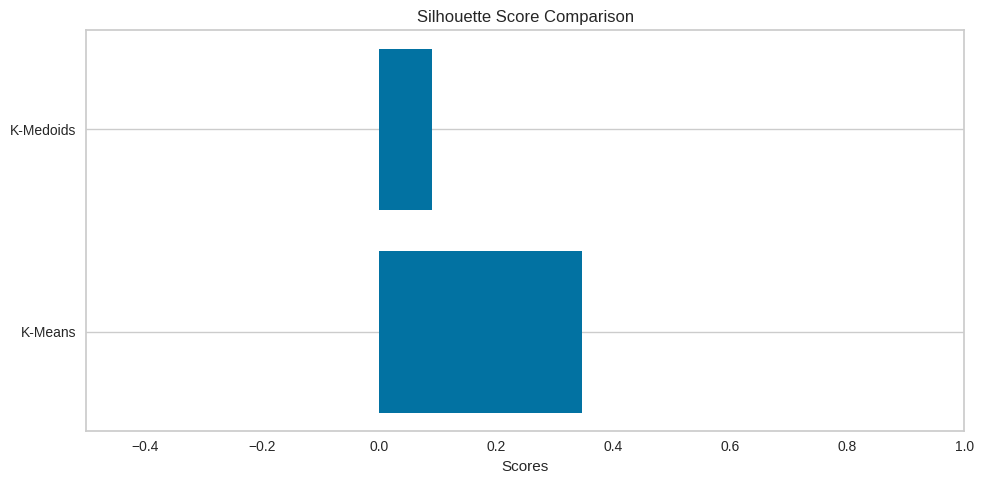

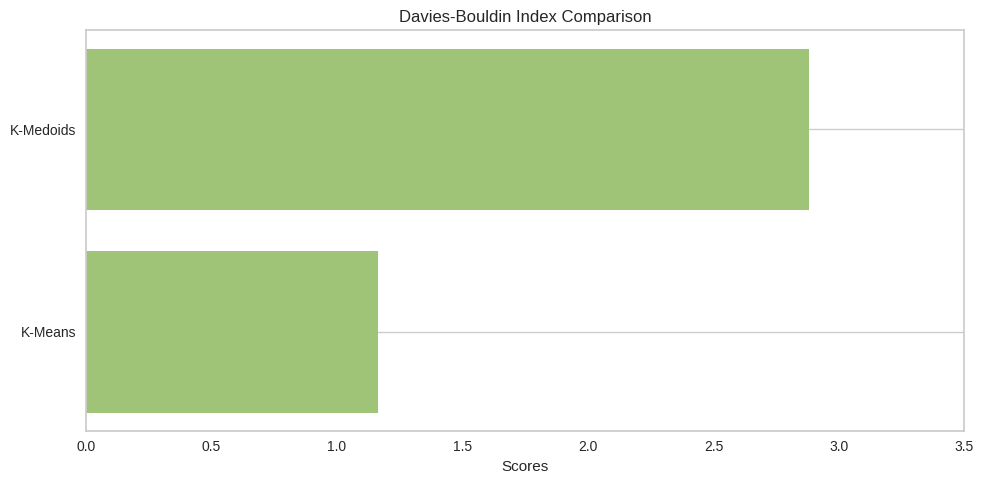

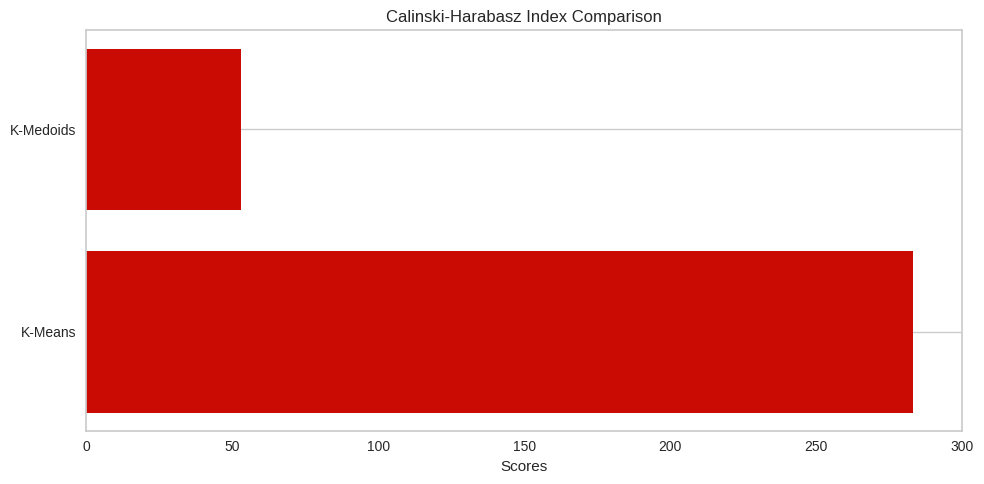

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each clustering algorithm
algorithms = ['K-Means', 'K-Medoids']
silhouette_scores = [0.347,0.0915,]  # Silhouette Scores
davies_bouldin_scores = [1.164, 2.8817]  # Davies-Bouldin Index
calinski_harabasz_scores = [283.229, 52.8902]  # Calinski-Harabasz Index

# Set up horizontal bar charts for each metric

# Visualization for Silhouette Score
plt.figure(figsize=(10, 5))
plt.barh(algorithms, silhouette_scores, color='b', label='Silhouette Score')
plt.xlabel('Scores')
plt.title('Silhouette Score Comparison')
plt.xlim([-0.5, 1])  # Adjust x-axis limits for better visualization
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Visualization for Davies-Bouldin Index
plt.figure(figsize=(10, 5))
plt.barh(algorithms, davies_bouldin_scores, color='g', label='Davies-Bouldin Index')
plt.xlabel('Scores')
plt.title('Davies-Bouldin Index Comparison')
plt.xlim([0, 3.5])  # Adjust x-axis limits based on expected range
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Visualization for Calinski-Harabasz Index
plt.figure(figsize=(10, 5))
plt.barh(algorithms, calinski_harabasz_scores, color='r', label='Calinski-Harabasz Index')
plt.xlabel('Scores')
plt.title('Calinski-Harabasz Index Comparison')
plt.xlim([0, 300])  # Adjust x-axis limits based on expected range
plt.grid(axis='x')
plt.tight_layout()
plt.show()
